In [1]:
import pandas as pd
df = pd.read_pickle('m10')
shift = 1

In [2]:
df.columns

Index(['t_DATE', 't_TIME', 't_SEC', 't_BID', 't_ASK', 't_LAST', 't_VOLUME',
       't_TYPE', 'iAC', 'iAD', 'iADX', 'iADXWilder', 'iAlligator', 'iAMA',
       'iAO', 'iATR', 'iBearsPower', 'iBands', 'iBullsPower', 'iCCI',
       'iChaikin', 'iDEMA', 'iDeMarker', 'iEnvelopes', 'iForce', 'iFractals',
       'iFrAMA', 'iIchimoku', 'iBWMFI', 'iMomentum', 'iMFI', 'iMA', 'iOsMA',
       'iMACD', 'iOBV', 'iSAR', 'iRSI', 'iRVI', 'iStdDEV', 'iStochastic',
       'iTEMA', 'iTriX', 'iWPR', 'iVIDyA', 'iVolumes', 't_DATE-TIME'],
      dtype='object')

In [9]:
df = df[['t_DATE', 't_TIME', 't_SEC', 't_BID', 't_ASK', 't_LAST','iCCI','iForce', 'iMFI', 'iRSI', 'iWPR']]

#### Volume 1

In [4]:
df['t_LAST_DELTA-10']= df['t_LAST']-df['t_LAST'].shift(shift)
df = df.dropna()

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mlt

Text(0, 0.5, 'iForce')

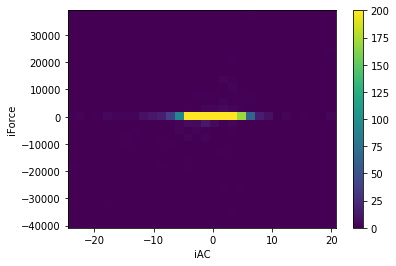

In [5]:
plt.hist2d(df['iAC'], df['iForce'], bins=(30, 30), vmax=200)
plt.colorbar()
plt.xlabel('iAC')
plt.ylabel('iForce')

In [14]:
import numpy as np

In [6]:
v = df['iForce']
v_rad = df['iAC']*np.pi / 180
df['Vx'] = v*np.cos(v_rad)
df['Vy'] = v*np.sin(v_rad)
#df=df.drop(columns=['iVolumes','iAC','t_VOLUME'])

(-40824.17560800036, 38840.89851382935, -2493.786973665246, 9340.727909872543)

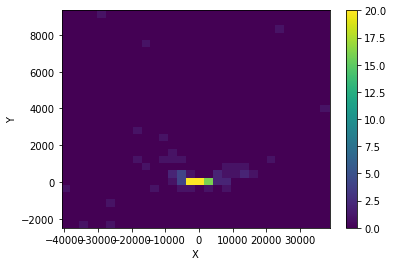

In [7]:
plt.hist2d(df['Vx'], df['Vy'], bins=(30, 30), vmax=20)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Y')
ax = plt.gca()
ax.axis('tight')

#### Time

Transform time values in sin and cossine, witch is way better to model to interpret

In [10]:
df['t_DATE-TIME']=df['t_DATE']+" "+df['t_TIME']
df['t_DATE-TIME']
date_time = pd.to_datetime(df.pop('t_DATE-TIME'), format='%Y.%m.%d %H:%M')
df = df.drop(columns=['t_DATE', 't_TIME', 't_SEC'])
date_time

C:\Users\Henrique\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0       2020-08-10 09:05:00
1       2020-08-10 09:06:00
2       2020-08-10 09:07:00
3       2020-08-10 09:08:00
4       2020-08-10 09:09:00
                ...        
12447   2020-09-18 17:45:00
12448   2020-09-18 17:46:00
12449   2020-09-18 17:47:00
12450   2020-09-18 17:48:00
12451   2020-09-18 17:49:00
Name: t_DATE-TIME, Length: 12452, dtype: datetime64[ns]

In [11]:
import datetime
timestamp_s = date_time.map(datetime.datetime.timestamp)
timestamp_s

0        1.597061e+09
1        1.597061e+09
2        1.597061e+09
3        1.597061e+09
4        1.597061e+09
             ...     
12447    1.600462e+09
12448    1.600462e+09
12449    1.600462e+09
12450    1.600462e+09
12451    1.600462e+09
Name: t_DATE-TIME, Length: 12452, dtype: float64

In [15]:
day = 24*60*60
df['day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['day cos'] = np.cos(timestamp_s * (2 * np.pi / day))

Text(0.5, 1.0, 'time signal')

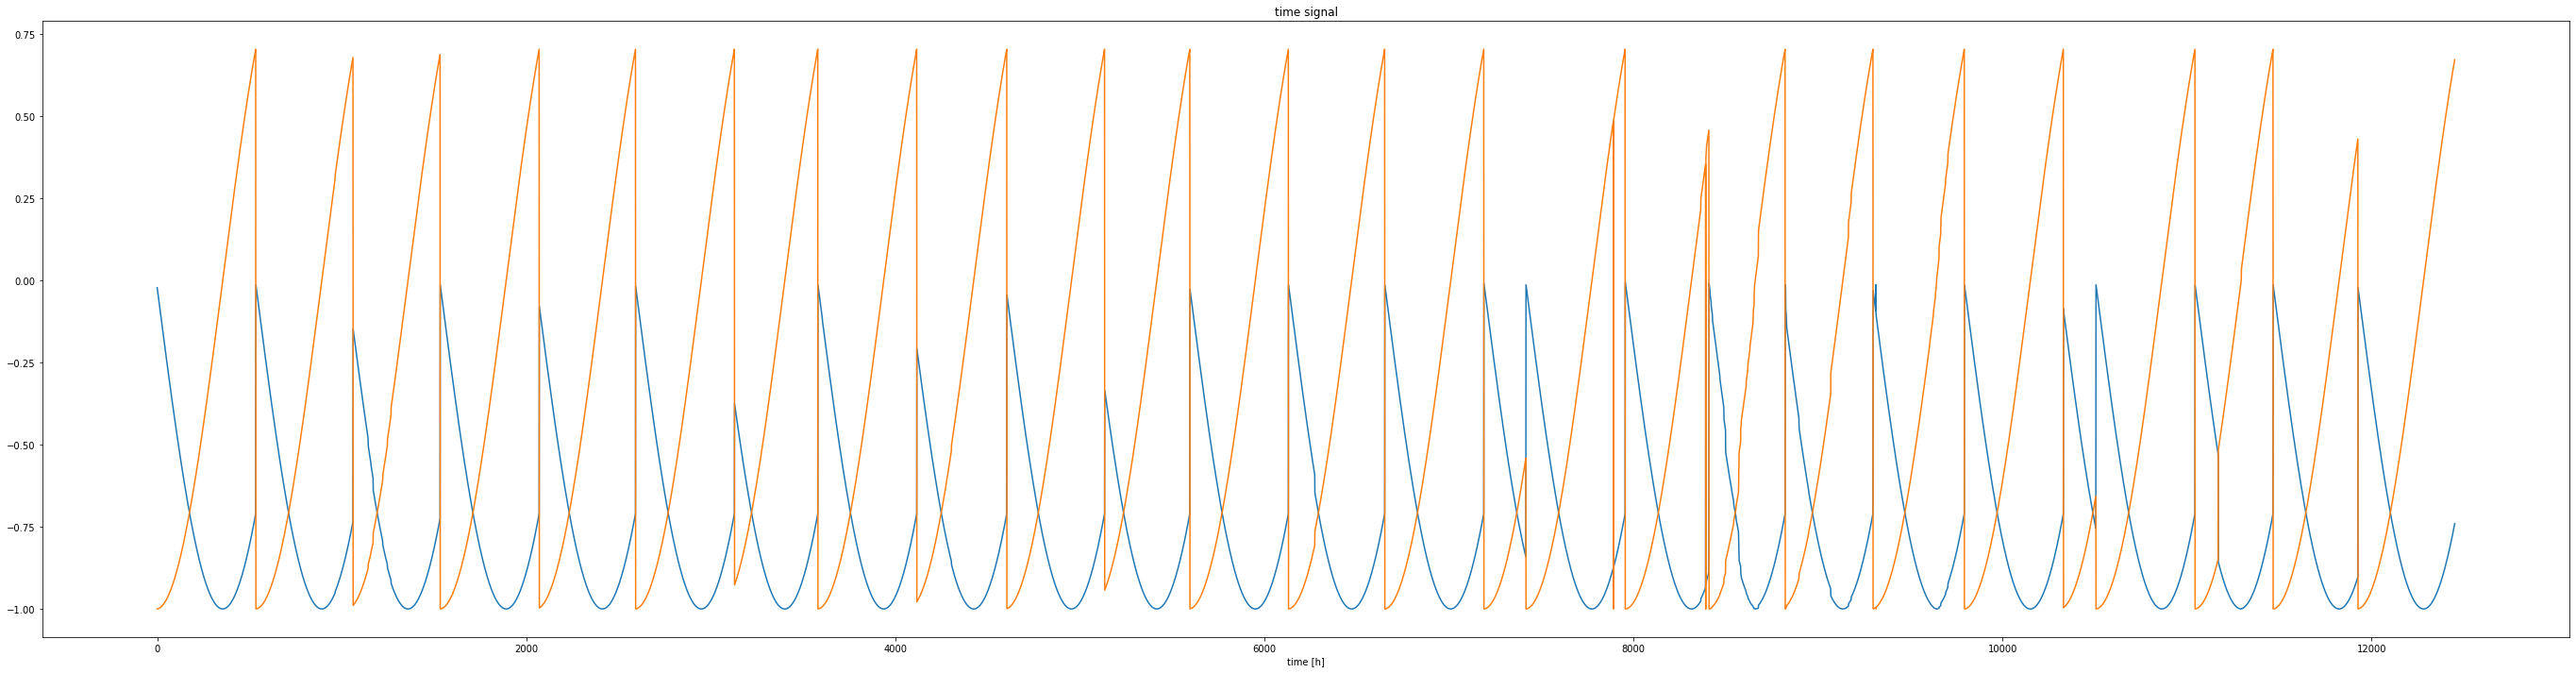

In [16]:
plt.figure(figsize=(48,12))
plt.plot(np.array(df['day sin'])[:])
plt.plot(np.array(df['day cos'])[:])
plt.xlabel('time [h]')
plt.title('time signal')

In [17]:
df

,t_BID,t_ASK,t_LAST,iCCI,iForce,iMFI,iRSI,iWPR,day sin,day cos
0,5423.5,5424.0,5423.5,7.299270,-10076.000000,36.427225,47.685062,-71.666667,-0.021815,-0.999762
1,5421.5,5422.0,5421.5,-3.261123,-13456.807692,36.301022,46.551581,-78.333333,-0.026177,-0.999657
2,5428.5,5429.0,5429.0,27.711797,-2072.615385,34.511246,51.107176,-53.333333,-0.030539,-0.999534
3,5425.0,5425.5,5425.0,11.460856,-11728.461538,33.590583,48.572070,-66.666667,-0.034899,-0.999391
4,5419.0,5419.5,5419.5,-23.956194,-28963.846154,32.290619,45.470734,-85.000000,-0.039260,-0.999229
...,...,...,...,...,...,...,...,...,...,...
12447,5393.0,5393.5,5393.0,143.123543,20660.538462,80.617453,80.265715,-5.504587,-0.751840,0.659346
12448,5393.5,5394.0,5393.5,143.965852,22134.615385,80.654554,80.416761,-4.587156,-0.748956,0.662620
12449,5393.5,5394.5,5393.5,143.965852,23534.615385,80.695416,80.416761,-4.587156,-0.746057,0.665882
12450,5391.5,5392.0,5391.5,140.584795,25259.076923,80.775864,79.798263,-8.256881,-0.743145,0.669131


In [13]:
df['iRSI']

1        36.231944
2        46.881029
3        42.630395
4        37.626768
5        37.125031
           ...    
12974    66.221791
12975    69.687086
12976    69.012759
12977    69.737744
12978    70.537191
Name: iRSI, Length: 12978, dtype: float64

In [14]:
df.columns

Index(['t_BID', 't_ASK', 't_LAST', 't_VOLUME', 't_TYPE', 'iAC', 'iAD', 'iADX',
       'iADXWilder', 'iAlligator', 'iAMA', 'iAO', 'iATR', 'iBearsPower',
       'iBands', 'iBullsPower', 'iCCI', 'iChaikin', 'iDEMA', 'iDeMarker',
       'iEnvelopes', 'iForce', 'iFractals', 'iFrAMA', 'iIchimoku', 'iBWMFI',
       'iMomentum', 'iMFI', 'iMA', 'iOsMA', 'iMACD', 'iOBV', 'iSAR', 'iRSI',
       'iRVI', 'iStdDEV', 'iStochastic', 'iTEMA', 'iTriX', 'iWPR', 'iVIDyA',
       'iVolumes', 't_LAST_DELTA-10', 'Vx', 'Vy', 'day sin', 'day cos'],
      dtype='object')

In [15]:
df['t_BID'].describe()

count    12978.000000
mean      5429.253930
std        112.933083
min       5214.000000
25%       5337.500000
50%       5411.500000
75%       5516.500000
max       5901.500000
Name: t_BID, dtype: float64

In [21]:
features_list = ['iMFI','iWPR','iCCI','iRSI','DELTA','t_LAST_DELTA']
#df['Vol_slope'] = df['Vy'] / df['Vx']
#df['Vol_slope'] = np.arctan(df['Vol_slope'])
#df['t_LAST'] = df['t_LAST'] - df['iVIDyA']
#df['iOsMA'] = df['iOsMA'] / abs(df['iOsMA'])
df['iMFI'] = [1 if x > 80 else -1 if x < 20 else 0 for x in df['iMFI']]
df['iWPR'] = [1 if x > -20 else -1 if x < -80 else 0 for x in df['iWPR']]
df['iCCI'] = [1 if x > 100 else -1 if x < -100 else 0 for x in df['iCCI']]
df['iRSI'] = [1 if x > 70 else -1 if x < 30 else 0 for x in df['iRSI']]
df['DELTA'] = df['t_LAST'] - df['t_LAST'].shift(1)
df['t_LAST_DELTA'] = df['t_LAST'].shift(-shift) - df['t_LAST']
df = df.dropna()
#df['up'] = [1 if x >= 6 else 0 for x in df['t_LAST_DELTA']]
#df['const'] = [1 if -6 <= x < 6 else 0 for x in df['t_LAST_DELTA']]
#df['down'] = [1 if x < -6 else 0 for x in df['t_LAST_DELTA']]
#df['Vx'] = df['Vx'] / 1000
#df['Vy'] = df['Vy'] / 1000

#df['t_LAST_DELTA-10'] = df['t_LAST'] - df['t_LAST'].shift(10)
#df['t_LAST_DELTA-5'] = df['t_LAST'] - df['t_LAST'].shift(5)
df = df[features_list]
df.set_index(np.arange(len(df)))
df

C:\Users\Henrique\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Henrique\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Henrique\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

,iMFI,iWPR,iCCI,iRSI,DELTA,t_LAST_DELTA
2,-1,1,0,-1,7.5,-4.0
3,-1,1,0,-1,-4.0,-5.5
4,-1,1,0,-1,-5.5,-1.0
5,-1,1,0,-1,-1.0,1.5
6,-1,1,0,-1,1.5,-2.0
...,...,...,...,...,...,...
12445,-1,1,0,-1,-0.5,-0.5
12446,-1,1,0,-1,-0.5,0.5
12447,-1,1,0,-1,0.5,0.5
12448,-1,1,0,-1,0.5,0.0


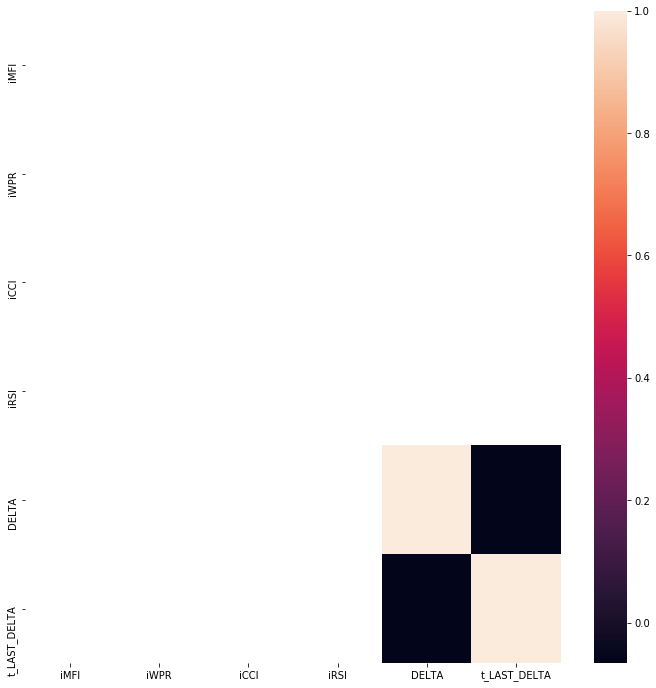

In [22]:
import seaborn as sn
import matplotlib.pyplot as plt

#sns.pairplot(df)

plt.figure(figsize=(12,12))
sn.heatmap(df.corr()) # , annot = True
plt.show()

In [23]:
df = df.dropna()

In [24]:
df.describe()

,iMFI,iWPR,iCCI,iRSI,DELTA,t_LAST_DELTA
count,12448.0,12448.0,12448.0,12448.0,12448.000000,12448.000000
mean,-1.0,1.0,0.0,-1.0,-0.002249,-0.003013
std,0.0,0.0,0.0,0.0,3.211261,3.210607
min,-1.0,1.0,0.0,-1.0,-67.000000,-67.000000
25%,-1.0,1.0,0.0,-1.0,-1.000000,-1.000000
50%,-1.0,1.0,0.0,-1.0,0.000000,0.000000
75%,-1.0,1.0,0.0,-1.0,1.500000,1.500000
max,-1.0,1.0,0.0,-1.0,68.500000,68.500000


In [25]:
len(df)

12448

In [26]:
def window_df(df, window_size,shift=shift):
    x=[]
    y=[]
    for index, row in df.iterrows():
       if (index+window_size+shift) >= len(df):
        break
       x.append(np.array(df.iloc[index:index+window_size,:-1].values))
       y.append(df.iloc[index+window_size+shift,-1])
    
    return np.array(x),np.array(y)

In [27]:
x,y = window_df(df, 10)

In [28]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

In [29]:
X_train, X_val, y_train, y_val = train_df.iloc[:,:-1].values, val_df.iloc[:,:-1].values, train_df.iloc[:,-1].values, val_df.iloc[:,-1].values

In [43]:
n = len(x)
X_train, X_val, y_train, y_val = x[0:int(n*0.7)], x[int(n*0.7):int(n*0.9)], y[0:int(n*0.7)], y[int(n*0.7):int(n*0.9)]

In [ ]:
X_train = X_train.values
X_val = X_val.values
y_train = y_train.values
y_val = y_val.values

In [31]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(8713, 5) (2490, 5) (8713,) (2490,)


In [65]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [32]:
import tensorflow as tf

In [33]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True
        
def scheduler(epoch, lr):
  if epoch < 150:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

def weights_cal_and_fit(sequencial,X_train, y_train,validation_data, w_cal, w_epochs, MAX_EPOCHS):
        early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min')
    
        model_loss=np.zeros(w_cal)
        weights_holder=[]
        for i in range(w_cal):
            model=sequencial
            model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(lr=1e-2, momentum=0.9),metrics=["accuracy"])
            temp_history = model.fit(X_train, y_train, epochs=w_epochs,validation_data=validation_data,verbose=0)
            model_loss.put(i, temp_history.history['accuracy'][-1])
            weights_holder.append(model)
        model=weights_holder[np.argmax(model_loss)]
        history = model.fit(X_train, y_train, epochs=MAX_EPOCHS,batch_size=72,validation_data=validation_data)
        return history, model

In [25]:
from tensorflow import keras
METRICS = []

Instantiate and evaluate this model:

## BASELINE

In [34]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_val[:-1],y_val[1:])

2.7577340297308157

In [44]:
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),
    tf.keras.layers.SimpleRNN(512, return_sequences=True),
    tf.keras.layers.SimpleRNN(256),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(100,kernel_regularizer=tf.keras.regularizers.L1(0.004),activity_regularizer=tf.keras.regularizers.L2(0.04)),
    tf.keras.layers.Dense(1),
])
#optimizer=keras.optimizers.Adam(lr=1e-3),
model.compile(loss='mae', optimizer='sgd',metrics=['mse'])
my_callback1 = tf.keras.callbacks.LearningRateScheduler(scheduler)
my_callback2 = myCallback()
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [45]:
%%time
MAX_EPOCHS=30
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS, batch_size=100, validation_data=(X_val, y_val),verbose=2,shuffle=False)

Epoch 1/30
88/88 - 4s - loss: 8.4121 - mse: 11.3673 - val_loss: 8.2241 - val_mse: 9.4966
Epoch 2/30
88/88 - 4s - loss: 8.0439 - mse: 11.3624 - val_loss: 7.8073 - val_mse: 9.4843
Epoch 3/30
88/88 - 4s - loss: 7.6961 - mse: 11.3563 - val_loss: 7.4448 - val_mse: 9.4843
Epoch 4/30
88/88 - 4s - loss: 7.3624 - mse: 11.3596 - val_loss: 7.1106 - val_mse: 9.4831
Epoch 5/30
88/88 - 4s - loss: 7.0399 - mse: 11.3587 - val_loss: 6.7912 - val_mse: 9.4836
Epoch 6/30
88/88 - 4s - loss: 6.7263 - mse: 11.3527 - val_loss: 6.4871 - val_mse: 9.4844
Epoch 7/30
88/88 - 4s - loss: 6.4248 - mse: 11.3459 - val_loss: 6.1887 - val_mse: 9.4850
Epoch 8/30
88/88 - 4s - loss: 6.1324 - mse: 11.3571 - val_loss: 5.9022 - val_mse: 9.4858
Epoch 9/30
88/88 - 4s - loss: 5.8502 - mse: 11.3553 - val_loss: 5.6239 - val_mse: 9.4849
Epoch 10/30
88/88 - 4s - loss: 5.5774 - mse: 11.3581 - val_loss: 5.3574 - val_mse: 9.4861
Epoch 11/30
88/88 - 4s - loss: 5.3149 - mse: 11.3554 - val_loss: 5.1004 - val_mse: 9.4855
Epoch 12/30
88/88 -

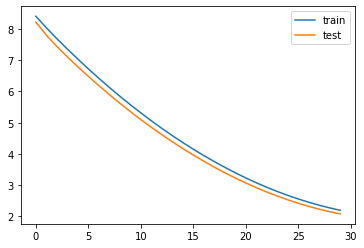

In [46]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [47]:
X_test, y_test = test_df.iloc[:,:-1], test_df.iloc[:,-1]
#X_test = scaler.transform(X_test)

In [48]:
predict=model.predict(X_test)

In [44]:
#predict=xgb_preds
predict=hp_preds

In [ ]:
predict

In [326]:
y_test_v = y_test.values

In [ ]:
y_test_v

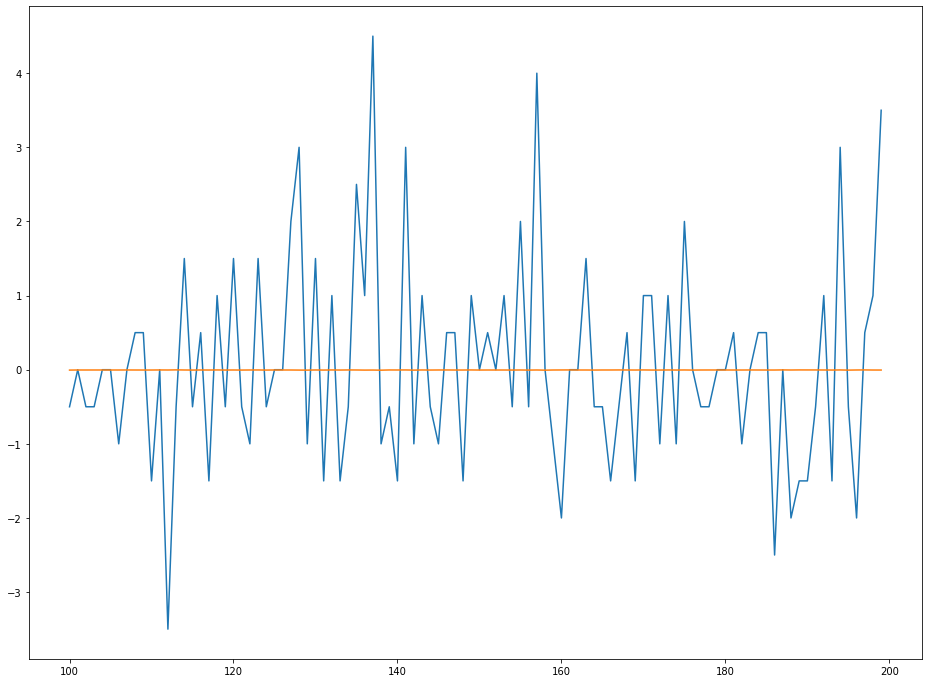

In [49]:
start=100
end=200
plt.figure(figsize = (16, 12))
plt.plot(np.arange(len(y_test))[start:end], y_test[start:end])
plt.plot(np.arange(len(predict))[start:end], predict[start:end])
plt.show()

In [41]:
model.evaluate(X_test, y_test)

39/39 [==============================] - 0s 2ms/step - loss: 1.4584 - mse: 4.6303


[1.4583710432052612, 4.630308628082275]

In [33]:
model.save('models/RNN_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/RNN_model\assets


In [17]:
loaded_model = tf.keras.models.load_model('models/RNN_model')
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, None, 1)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 32)          1088      
_________________________________________________________________
dropout (Dropout)            (None, None, 32)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,497
Trainable params: 1,497
Non-trainable params: 0
______________________________________________________

In [18]:
model = loaded_model

In [19]:
import thread_main_loop as tml

In [20]:
t1 = tml.thread_main_loop(model, "0", "1", scaler)
t1.start()

#########
t_BID      5533.000000
t_ASK      5533.500000
t_LAST     5533.500000
Vx        -2733.196299
Vy        -7077.584827
day sin      -0.477159
day cos      -0.878817
Name: 0, dtype: float64
#########


Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\Henrique\anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\Henrique\Workspace\jupyter_workspace\my_advisor\thread_main_loop.py", line 115, in run
    last_row = self.scaler.transform(last_row)
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py", line 794, in transform
    force_all_finite='allow-nan')
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\base.py", line 436, in _validate_data
    self._check_n_features(X, reset=reset)
  File "C:\Users\Henrique\anaconda3\lib\site-packages\sklearn\base.py", line 380, in _check_n_features
    self.n_features_in_)
ValueError: X has 7 features, but this StandardScaler is expecting 8 features as input.



In [6]:
t1.kill()

In [25]:
import tensorflow as tf

In [82]:
from tensorflow import keras
METRICS = [
    tf.keras.metrics.MeanSquaredLogarithmicError(
    name='mean_squared_logarithmic_error', dtype=None
    )
]

In [105]:
output_bias = y_train.mean()
output_bias = tf.keras.initializers.Constant(output_bias)

model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape=(X_train[0].shape)),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16,kernel_regularizer=tf.keras.regularizers.L1(0.008),activity_regularizer=tf.keras.regularizers.L2(0.08)),
    tf.keras.layers.Dense(1, use_bias=True, bias_initializer=output_bias)
])

In [106]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(
      optimizer=optimizer,
      loss='mae',
      metrics='mse')

In [107]:
%%time
MAX_EPOCHS=100
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS,batch_size=72, validation_data=(X_val, y_val),verbose=2,shuffle=False, )

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

127/127 - 4s - loss: 2.2504 - mse: 9.1768 - val_loss: 1.8397 - val_mse: 6.6513
Epoch 2/100
127/127 - 3s - loss: 1.9222 - mse: 9.1761 - val_loss: 1.6033 - val_mse: 6.6513
Epoch 3/100
127/127 - 3s - loss: 1.7784 - mse: 9.1766 - val_loss: 1.5531 - val_mse: 6.6512
Epoch 4/100
127/127 - 3s - loss: 1.7662 - mse: 9.1766 - val_loss: 1.5532 - val_mse: 6.6512
Epoch 5/100
127/127 - 3s - loss: 1.7662 - mse: 9.1766 - val_loss: 1.5532 - val_mse: 6.6513
Epoch 6/100
127/127 - 3s - loss: 1.7662 - mse: 9.1766

KeyboardInterrupt: 

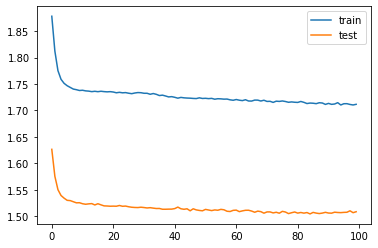

In [86]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [90]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),input_shape=[None]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(8,kernel_regularizer=tf.keras.regularizers.L1(0.004),activity_regularizer=tf.keras.regularizers.L2(0.04)),
    tf.keras.layers.Dense(1),
])
optimizer = tf.keras.optimizers.Adam(lr=1e-2)
model.compile(loss='mae', optimizer=optimizer,metrics=['mse'])

In [60]:
output_bias = y_val.mean()
output_bias = tf.keras.initializers.Constant(output_bias)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64),
    tf.keras.layers.Dense(1)
])

In [61]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mae',
            optimizer=optimizer,
            metrics=['mse'])

In [62]:
%%time
MAX_EPOCHS=100
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS, batch_size=72, validation_data=(X_val, y_val),verbose=2,shuffle=False)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

127/127 - 0s - loss: 13479.5801 - mse: 265394432.0000 - val_loss: 1469.8789 - val_mse: 2421261.5000
Epoch 2/100
127/127 - 0s - loss: 12563.5117 - mse: 300626176.0000 - val_loss: 2946.6235 - val_mse: 13590378.0000
Epoch 3/100
127/127 - 0s - loss: 12403.8740 - mse: 215195104.0000 - val_loss: 3061.8892 - val_mse: 10297246.0000
Epoch 4/100
127/127 - 0s - loss: 12214.7285 - mse: 252580752.0000 - val_loss: 2143.3252 - val_mse: 8571822.0000
Epoch 5/100
127/127 - 0s - loss: 12181.9346 - mse: 2064107

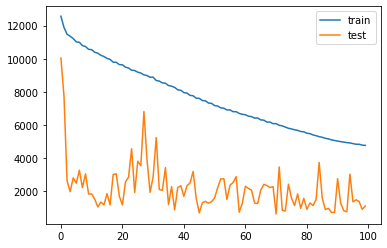

In [40]:
plt.plot(history.history['loss'][:], label='train')
plt.plot(history.history['val_loss'][:], label='test')
plt.legend()
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_val, y_val)

0.03786085936647132

In [35]:
reg.coef_

array([-2.61350397e+00, -1.94854460e-03, -4.91015446e-01, -1.29896094e-14,
       -7.00529345e-02, -6.32271555e-01, -5.55111512e-17,  3.09787079e-04,
       -3.14187475e-05, -1.07102535e-01])

In [36]:
reg.intercept_

-0.006391005260320137

In [80]:
predict = reg.predict(X_val)

In [81]:
for i in range(len(predict)):
    predict[i] = abs(predict[i])

In [ ]:
from sklearn.metrics import mean_squared_log_error
print(np.sqrt(mean_squared_log_error(y_val, predict)))

In [41]:
import xgboost as xgb
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

xgb_model = xgb.XGBRegressor(n_estimators=3000, learning_rate=0.003, random_state=0)

xgb_model.fit(X_train, y_train, verbose=True)

xgb_model.fit(X_train, y_train)

xgb_preds = xgb_model.predict(X_val)

print('MAE:', mean_absolute_error(y_val, xgb_preds))

MAE: 1.5611238724844922


In [ ]:
from sklearn.metrics import mean_squared_log_error
print(np.sqrt(mean_squared_log_error(y_val, xgb_preds)))

In [42]:
hp_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.002, max_delta_step=0, max_depth=4,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=2, random_state=3,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=2, verbosity=None)


hp_model.fit(X_train, y_train, verbose=True)

hp_preds = hp_model.predict(X_val)

print('MAE:', mean_absolute_error(y_val, hp_preds))

MAE: 1.5258322979355536


In [ ]:
from sklearn.metrics import mean_squared_log_error
print(np.sqrt(mean_squared_log_error(y_val, hp_preds)))

In [ ]:
np.any(np.isnan(test))

In [ ]:
from numpy import *
where_are_NaNs = isnan(test)
test[where_are_NaNs] = 0

In [ ]:
np.all(np.isfinite(test))

In [ ]:
test_predict=reg.predict(test)
submission['SalePrice']=test_predict

In [ ]:
submission

In [ ]:
submission.to_csv('submission.csv', index=False)